# Bio diversity #

In [42]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('bright')

In [7]:
os.chdir('C:\\Users\\tgsog\\OneDrive\\Desktop\\Project portfolio')
path = "C:\\Users\\tgsog\\OneDrive\\Desktop\\Project portfolio\\Biodiversity project\\biodiversity_starter"
obs_df = pd.read_csv("C:\\Users\\tgsog\\OneDrive\\Desktop\\Project portfolio\\Biodiversity project\\biodiversity_starter\\observations.csv")
spec_df = pd.read_csv("C:\\Users\\tgsog\\OneDrive\\Desktop\\Project portfolio\\Biodiversity project\\biodiversity_starter\\species_info.csv")

In [109]:
obs_df.head()
df.dtypes

scientific_name        object
park_name              object
observations            int64
category               object
common_names           object
conservation_status    object
dtype: object

In [9]:
spec_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [12]:
#merge data on scientific name - left join
df = pd.merge(obs_df,spec_df, on = "scientific_name", how = "left")

Index(['scientific_name', 'park_name', 'observations', 'category',
       'common_names', 'conservation_status'],
      dtype='object')

In [110]:
#filling not endagered
df.conservation_status.unique()
df.conservation_status =df.conservation_status.fillna("not endagered") 
df = df.drop_duplicates()

## Summary statistics: ##

In [111]:
df.describe(include = "all")

,scientific_name,park_name,observations,category,common_names,conservation_status
count,25601,25601,25601.000000,25601,25601,25601
unique,5541,4,NaN,7,5504,5
top,Castor canadensis,Bryce National Park,NaN,Vascular Plant,Brachythecium Moss,not endagered
freq,36,6406,NaN,19534,28,24721
mean,NaN,NaN,142.196477,NaN,NaN,NaN
std,NaN,NaN,69.901035,NaN,NaN,NaN
min,NaN,NaN,9.000000,NaN,NaN,NaN
25%,NaN,NaN,86.000000,NaN,NaN,NaN
50%,NaN,NaN,123.000000,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,NaN,NaN


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25601 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25601 non-null  object
 1   park_name            25601 non-null  object
 2   observations         25601 non-null  int64 
 3   category             25601 non-null  object
 4   common_names         25601 non-null  object
 5   conservation_status  25601 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [107]:
df.isna().sum()

scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
dtype: int64

## Visualizations ##

C:\Users\tgsog\AppData\Local\Temp\ipykernel_27164\3176812719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "category", data = df, edgecolor ="black", palette =["gold", "lightcoral", "lightskyblue",


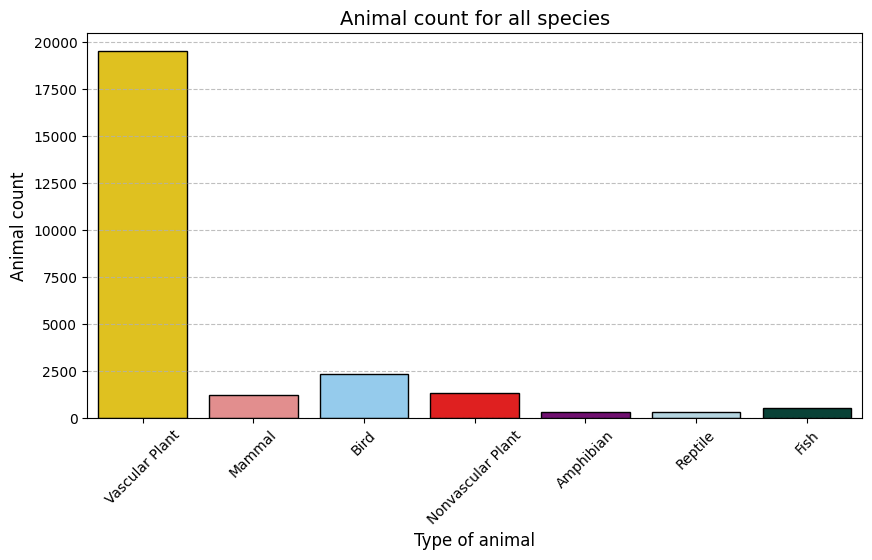

In [118]:
plt.figure(figsize = (10,5))
sns.countplot(x = "category", data = df, edgecolor ="black", palette =["gold", "lightcoral", "lightskyblue",
                                                                       "red", "purple", "lightblue", "#004B3D"])

plt.xlabel("Type of animal", fontsize = 12)
plt.ylabel("Animal count", fontsize = 12)
plt.title("Animal count for all species", fontsize =14)
plt.xticks(rotation =45)
plt.grid(axis ="y", linestyle = "--", alpha =0.8)

plt.show()
plt.close()

C:\Users\tgsog\AppData\Local\Temp\ipykernel_27164\1274342437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "conservation_status", data = df_ne, palette =["gold", "lightcoral", "lightskyblue", "red"], edgecolor ="black")


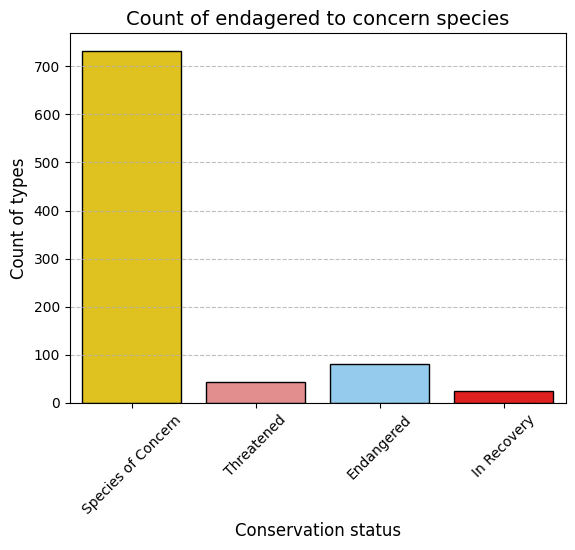

In [119]:
df_ne = df[df.conservation_status!="not endagered"]

sns.countplot(x = "conservation_status", data = df_ne, palette =["gold", "lightcoral", "lightskyblue", "red"], edgecolor ="black")

plt.xlabel("Conservation status", fontsize = 12)
plt.ylabel("Count of types", fontsize = 12)
plt.title("Count of endagered to concern species", fontsize =14)
plt.xticks(rotation =45)
plt.grid(axis ="y", linestyle = "--", alpha =0.8)

plt.show()
plt.close()

C:\Users\tgsog\AppData\Local\Temp\ipykernel_27164\1567482314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ="conservation_status" , y="observations" , data = df, palette =["gold", "lightcoral", "lightskyblue", "red", "purple"])


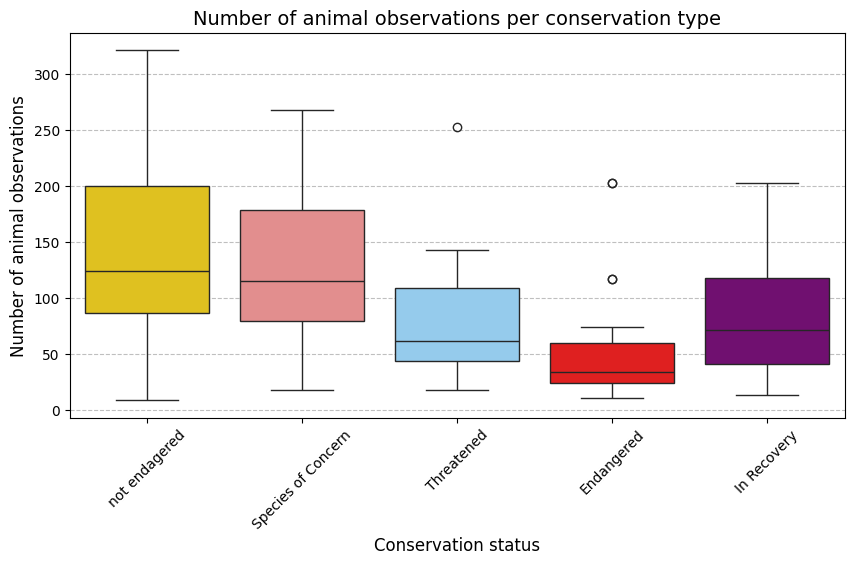

In [114]:
#Categorical
plt.figure(figsize = (10,5))
sns.boxplot(x ="conservation_status" , y="observations" , data = df, palette =["gold", "lightcoral", "lightskyblue", "red", "purple"])

plt.xlabel("Conservation status", fontsize = 12)
plt.ylabel("Number of animal observations", fontsize = 12)
plt.title("Number of animal observations per conservation type", fontsize =14)
plt.xticks(rotation =45)
plt.grid(axis ="y", linestyle = "--", alpha =0.8)

plt.show()
plt.close()

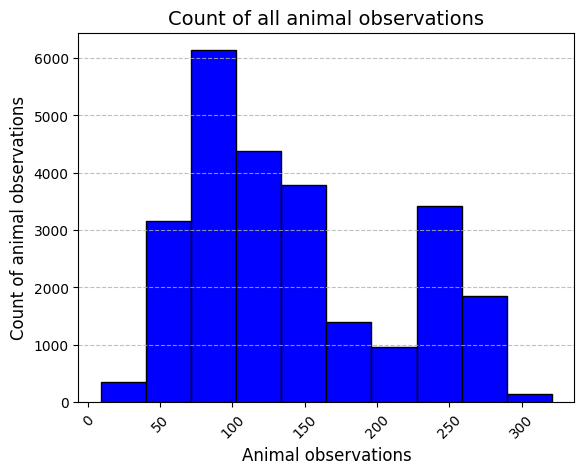

In [120]:
plt.hist(df.observations, color = "blue", label = "observations of animals", edgecolor = "black")

plt.xlabel("Animal observations", fontsize = 12)
plt.ylabel("Count of animal observations", fontsize = 12)
plt.title("Count of all animal observations", fontsize =14)
plt.xticks(rotation =45)
plt.grid(axis ="y", linestyle = "--", alpha =0.8)

plt.show()
plt.close()

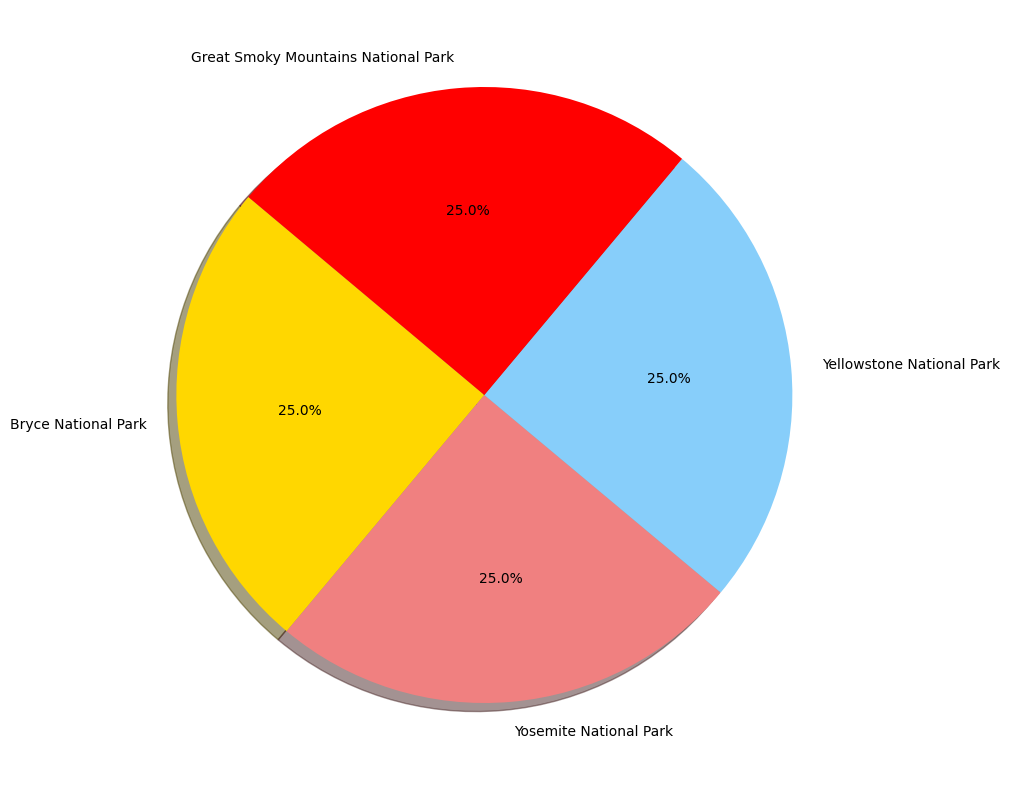

In [123]:
parks = df.park_name.value_counts()
plt.figure(figsize = (10,10))
plt.pie(parks.values, labels = [x for x in parks.index], autopct = "%1.1f%%", colors = ["gold", "lightcoral", "lightskyblue", "red"],
        startangle =140, shadow = True)

plt.show()
plt.close()